# Joining Light Curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import sys

We need to make sure the plots look a little nicer. 

In [2]:
try:
    plt.style.use('./jupyter.mplstyle')
except:
    import matplotlib as mpl
    mpl.rcParams['figure.figsize'] = 16, 6
    mpl.rcParams['font.sans-serif'] = 'Arial, Liberation Sans, DejaVu Sans, Bitstream Vera Sans, sans-serif'
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.size'] = 16

Next, we set the directories and object name.

In [3]:
obj='8430'
files = 'data/raw_data'  
all_detrended = 'detrended/'+obj+'detrended_all_gps.dat'

Prepare the output file:

In [4]:
f = open(all_detrended,"w+")
f.write("# BJD, flux, uncertainty \n")
f.close()

This function takes each Qurter, divides by the average, and then shifts it vertically to match the end of the previous quarter. It then reccords the position of the end of the quarter so that position of the next quarter can be determined.

In [5]:
def shift(data,last_time):
    arg = np.where((data[:,1]!= float('-inf')) & (data[:,1]!= float('inf')) & (data[:,3]!= float('-inf')) & (data[:,3]!= float('inf')))
    d=np.empty([len(data[:,1][arg]),3])
    d[:,0]=data[:,0][arg] # Time
    d[:,1]=data[:,3][arg] # Raw Flux = 1, Corrected Flux = 3
    d[:,2]=data[:,4][arg] # CorrectedFlux Error = 2, Raw Flux Error = 4
    med_d = np.median(d[:,1])
    d[:,1]=d[:,1]/med_d # median average the data first (to ensure relative eclipse depths are not adjusted)
    d[:,2]=d[:,2]/med_d
    orig = d.copy()# make a copy of the original (mean averaged) data for comparison later.
    
    # Here is where I select different points for the cases where 
    # there is an eclipse at the start of a segment
    if (d[:,0][0]>55560 and d[:,0][0]<55580):
        first_time = np.median(d[:,1][150:160])
    elif (d[:,0][0]>56380 and d[:,0][0]<56400):
        first_time = np.median(d[:,1][150:160])  
    else:
        first_time = np.median(d[:,1][0:10])

    diff=last_time-first_time
    d[:,1] = d[:,1]+diff    

    # Here is where I select different points for the cases where 
    # there is an eclipse at the end of a segment
    if (d[:,0][-1]>56380 and d[:,0][-1]<56400):
        new_last_time = np.median(d[:,1][-0:-190])
    else:
        new_last_time = np.median(d[:,1][-10:-1])


    return d, orig, new_last_time
    

This is the main function that reads in all the data (.dat) files in a directory that start with "kplr" and detrends each light curve. All detrended light curves are appended to a single file. Adjust the file names accordingly.

In [6]:
with open(all_detrended, 'w') as outfile:
    new_last_time = 0
    for i, file_name in enumerate (sorted(glob.glob((files+r"/kplr*dat")))):
        print(file_name)
        with open(file_name) as infile:
            lc = np.loadtxt(infile)
            last_time=new_last_time
            if (i == 0):
                arg = np.where((lc[:,1]!= float('-inf')) & (lc[:,1]!= float('inf')) & (lc[:,3]!= float('-inf')) & (lc[:,3]!= float('inf')))
                d=np.empty([len(lc[:,1][arg]),3])
                d[:,0]=lc[:,0][arg] # Time
                d[:,1]=lc[:,3][arg] # Raw Flux = 1, Corrected Flux = 3
                d[:,2]=lc[:,4][arg] # Raw Flux Error = 2, Raw Corrected Flux Error = 4
                med_d = np.median(d[:,1])
                d[:,1]=d[:,1]/med_d #divide flux by median
                d[:,2]=d[:,2]/med_d#divide errors by flux median
                new_last_time = np.median(d[:,1][-10:-1])
                complete_orig = d
                complete = d
                print("lightcurve ", i, " has been computed.")
            else:
                new_data, orig_data, new_last_time = shift(lc,last_time)
                complete = np.append(complete,new_data,axis=0)
                complete_orig = np.append(complete_orig, orig_data,axis=0)
                print("lightcurve ", i, " has been computed.")


data/raw_data/kplr008430105-2009131105131_llc.dat
lightcurve  0  has been computed.
data/raw_data/kplr008430105-2009166043257_llc.dat
lightcurve  1  has been computed.
data/raw_data/kplr008430105-2009259160929_llc.dat
lightcurve  2  has been computed.
data/raw_data/kplr008430105-2009350155506_llc.dat
lightcurve  3  has been computed.
data/raw_data/kplr008430105-2010078095331_llc.dat
lightcurve  4  has been computed.
data/raw_data/kplr008430105-2010174085026_llc.dat
lightcurve  5  has been computed.
data/raw_data/kplr008430105-2010265121752_llc.dat
lightcurve  6  has been computed.
data/raw_data/kplr008430105-2010355172524_llc.dat
lightcurve  7  has been computed.
data/raw_data/kplr008430105-2011073133259_llc.dat
lightcurve  8  has been computed.
data/raw_data/kplr008430105-2011177032512_llc.dat
lightcurve  9  has been computed.
data/raw_data/kplr008430105-2011271113734_llc.dat
lightcurve  10  has been computed.
data/raw_data/kplr008430105-2012004120508_llc.dat
lightcurve  11  has been 

<ErrorbarContainer object of 3 artists>

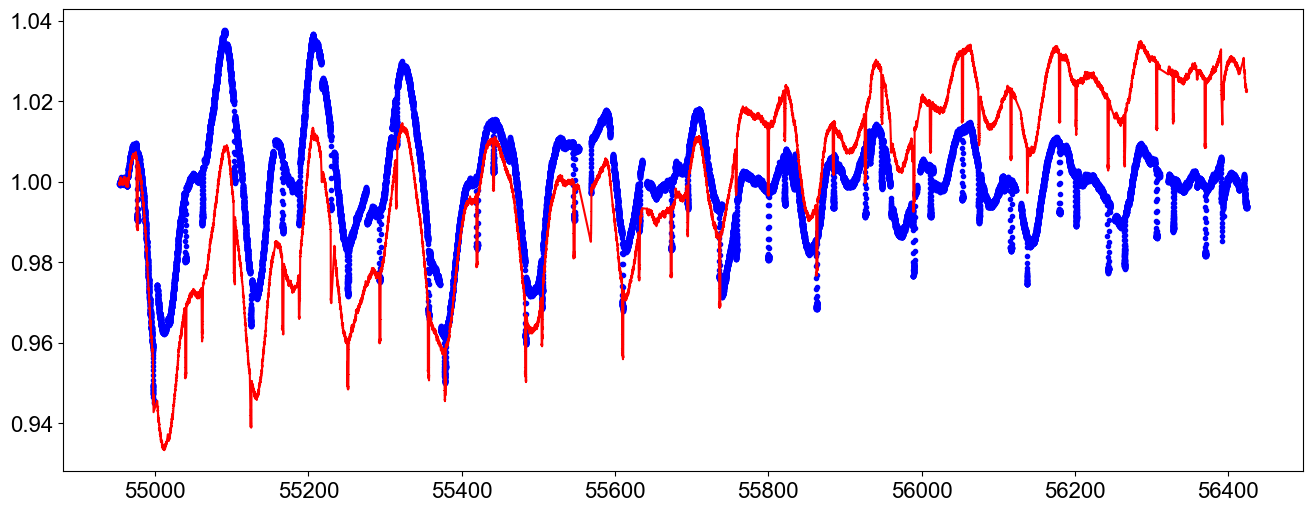

In [7]:
plt.errorbar(complete_orig[:,0], complete_orig[:,1],yerr=complete_orig[:,2], fmt='b.')
plt.errorbar(complete[:,0], complete[:,1],yerr=complete[:,2], fmt='r-')

(55250.0, 55350.0)

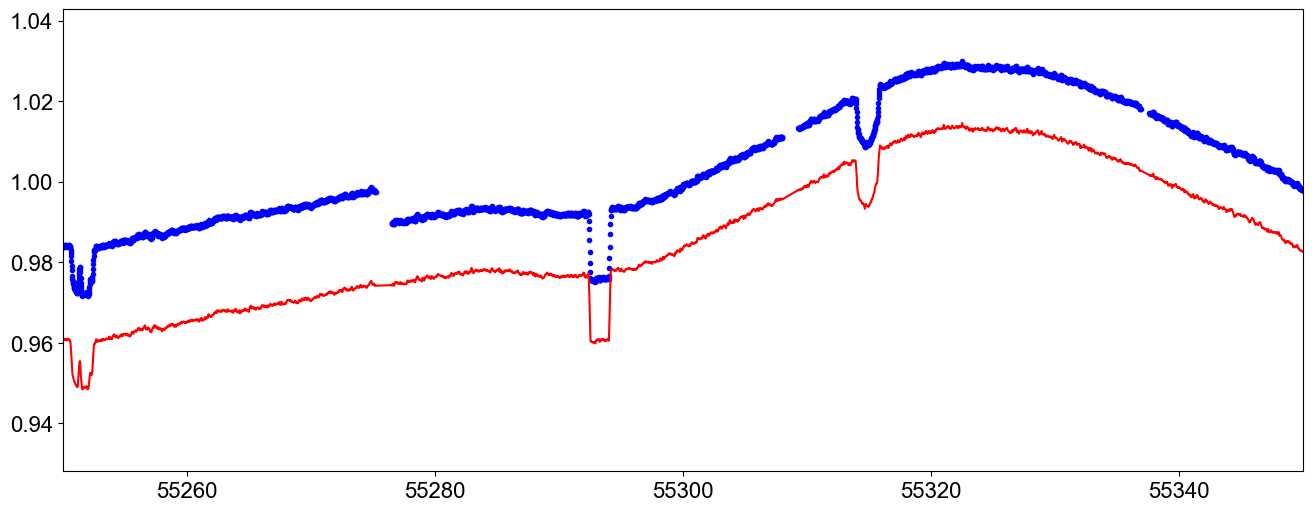

In [8]:
plt.plot(complete_orig[:,0], complete_orig[:,1],'b.')
plt.plot(complete[:,0], complete[:,1],'r-')
plt.xlim(55250,55350)

Sort and prepare data to save

In [9]:
med = np.median(complete[:,1])
complete[:,1]=complete[:,1]/med
complete[:,2]=complete[:,2]/med
complete.transpose()

array([[5.49535390e+04, 5.49535594e+04, 5.49535799e+04, ...,
        5.64239605e+04, 5.64239809e+04, 5.64240014e+04],
       [9.95764872e-01, 9.95846567e-01, 9.96148669e-01, ...,
        1.01856815e+00, 1.01877367e+00, 1.01870388e+00],
       [2.57840162e-05, 2.58184527e-05, 2.58073075e-05, ...,
        2.62547504e-05, 2.62495717e-05, 2.62562972e-05]])

In [10]:
print (complete)

[[5.49535390e+04 9.95764872e-01 2.57840162e-05]
 [5.49535594e+04 9.95846567e-01 2.58184527e-05]
 [5.49535799e+04 9.96148669e-01 2.58073075e-05]
 ...
 [5.64239605e+04 1.01856815e+00 2.62547504e-05]
 [5.64239809e+04 1.01877367e+00 2.62495717e-05]
 [5.64240014e+04 1.01870388e+00 2.62562972e-05]]


Plot the final data

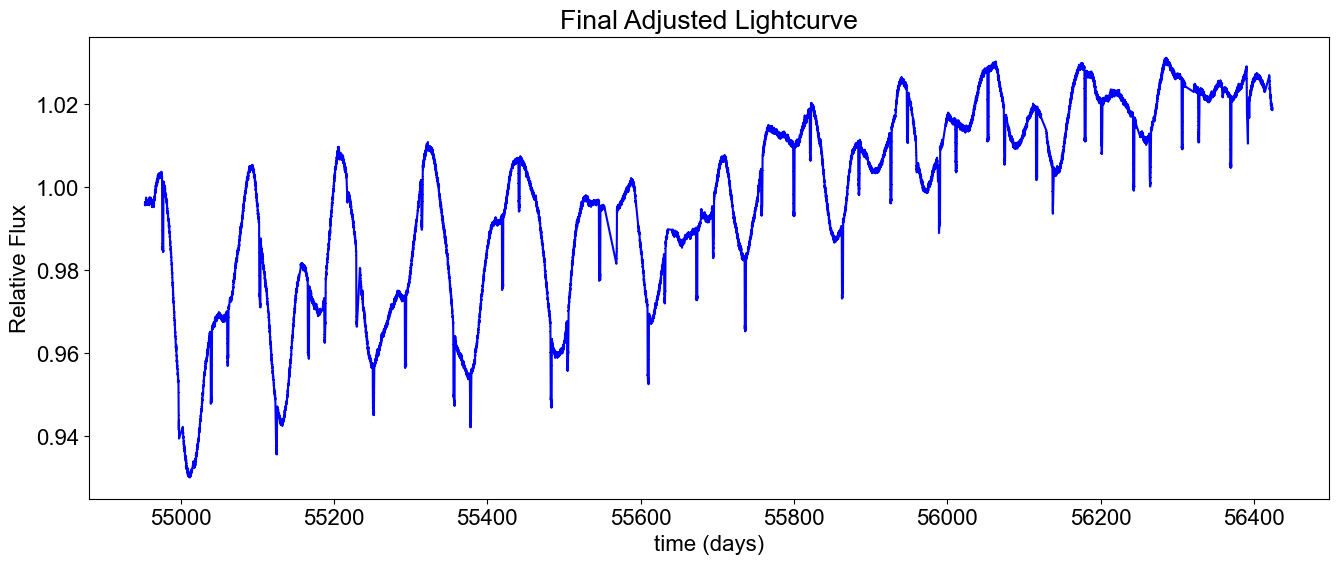

In [11]:
plt.errorbar(complete[:,0], complete[:,1],yerr=complete[:,2], fmt='b-')
plt.title("Final Adjusted Lightcurve")
plt.xlabel("time (days)")
plt.ylabel("Relative Flux")
plt.show()

In [12]:
np.savetxt("data/detrended_gps.dat",complete,fmt=('%16.10f %10.9f %9.8f'))